In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Dataset from https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [ ]:
mat = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/student-mat.csv', sep=';')

In [ ]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
por = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/student-por.csv', sep=';')

In [ ]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

sex - student's sex (binary: "F" - female or "M" - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: "U" - urban or "R" - rural)

famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

guardian - student's guardian (nominal: "mother", "father" or "other")

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [ ]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
mat['sub'] = 'maths'

In [ ]:
por['sub'] = 'portuguese'

In [ ]:
# merge both together
data = pd.concat([mat,por])

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sub
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,maths
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,maths
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,maths


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## EDA

In [ ]:
# columns that are object datatype
obj_col = data.dtypes[data.dtypes == np.object].index

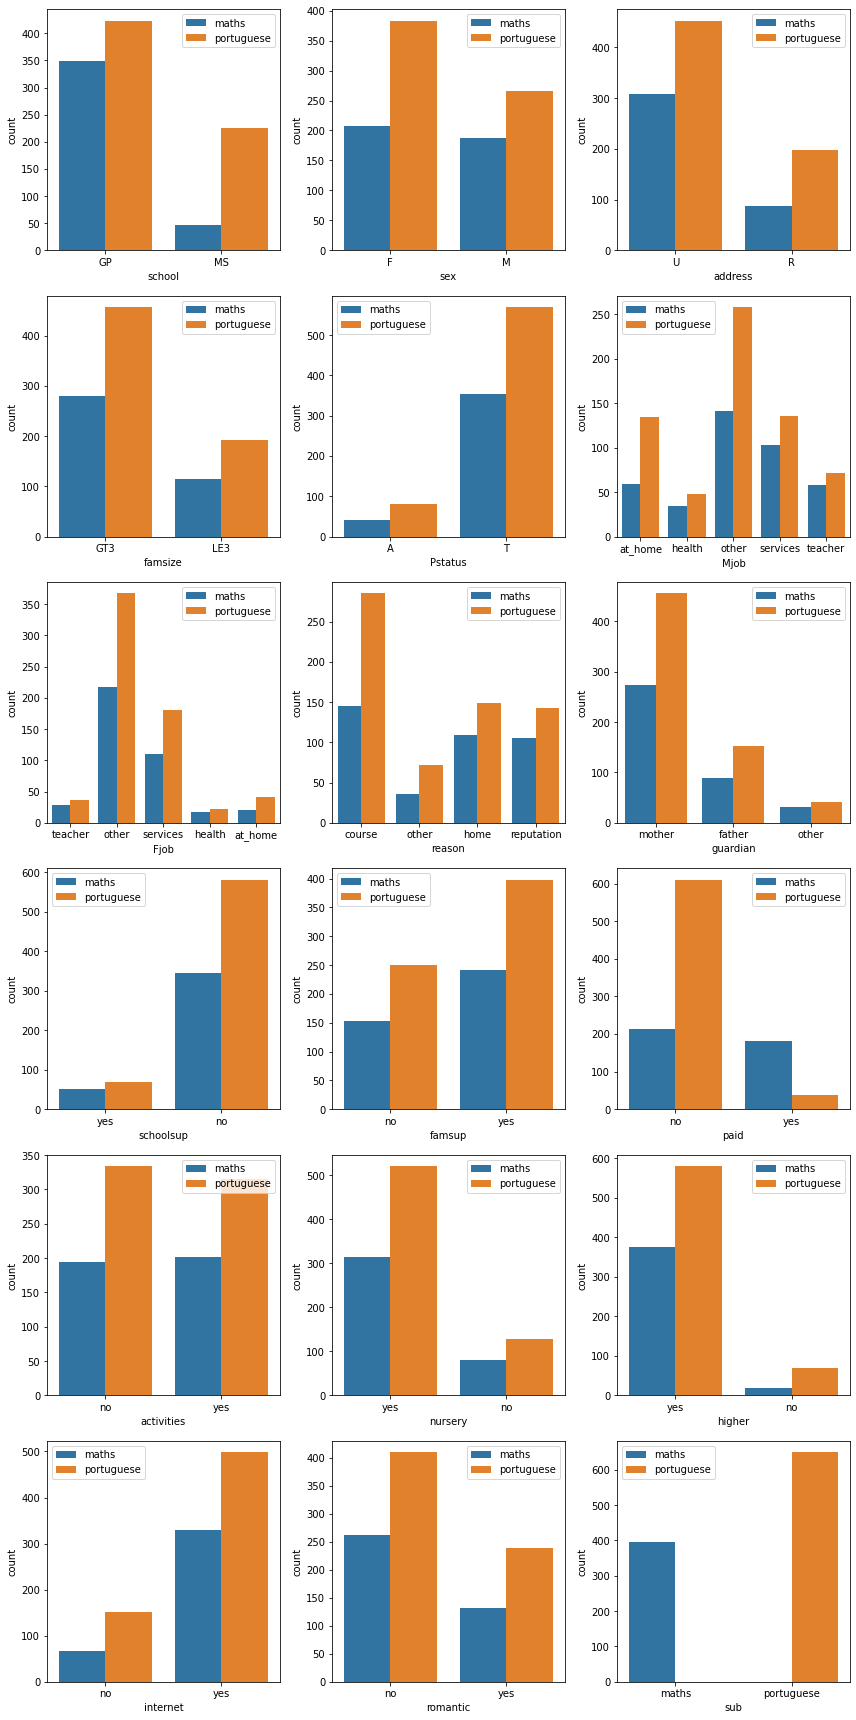

In [ ]:
plt.figure(figsize=(12,24))

for n, m in zip(obj_col,range(1,19)):
  plt.subplot(6,3,m)
  sns.countplot(x=n,hue='sub', data=data)
  plt.legend(loc='best')

plt.tight_layout()


School: There are less students taking maths in the school Mousinho da Silveira compared to Gabriel Pereira.

Sex: There are more females taking portuguese than males. For maths, both sexes are relatively the same.

Address: Urban students outnumbered rural students.

FamSize: A lot of students have families that are greater than 3 members.

Pstatus: Most of the students have parents that are living together.

Mother's Job: Beside others, most students mother's work at home or as a civil servant.

Father's Job: Beside others, most students mother's are civil servants.

Reason: Students choose their school mostly due to the courses provided.

Guardian: Most of the students guardian is their mother.

Schoolsup: Most students do not have extra educational support.

Famsup: Most students are support by their families.

Paid: There is an extremly high amount of students who didn't paid for portuguese extra class compared to maths

Activities: There is about the same number of students who took extracurricular activities compare to those who didn't.

Nursery: Most students had attended nursery school.

Higher: Most students want to take higher education.

Internet: Most students have internet at home.

Romantic: Most students are not in a romantic relationship.


In [ ]:
# columns that are object datatype
int_col = data.dtypes[data.dtypes != np.object].index

int_col = int_col.drop(['absences','G1','G2','G3'])

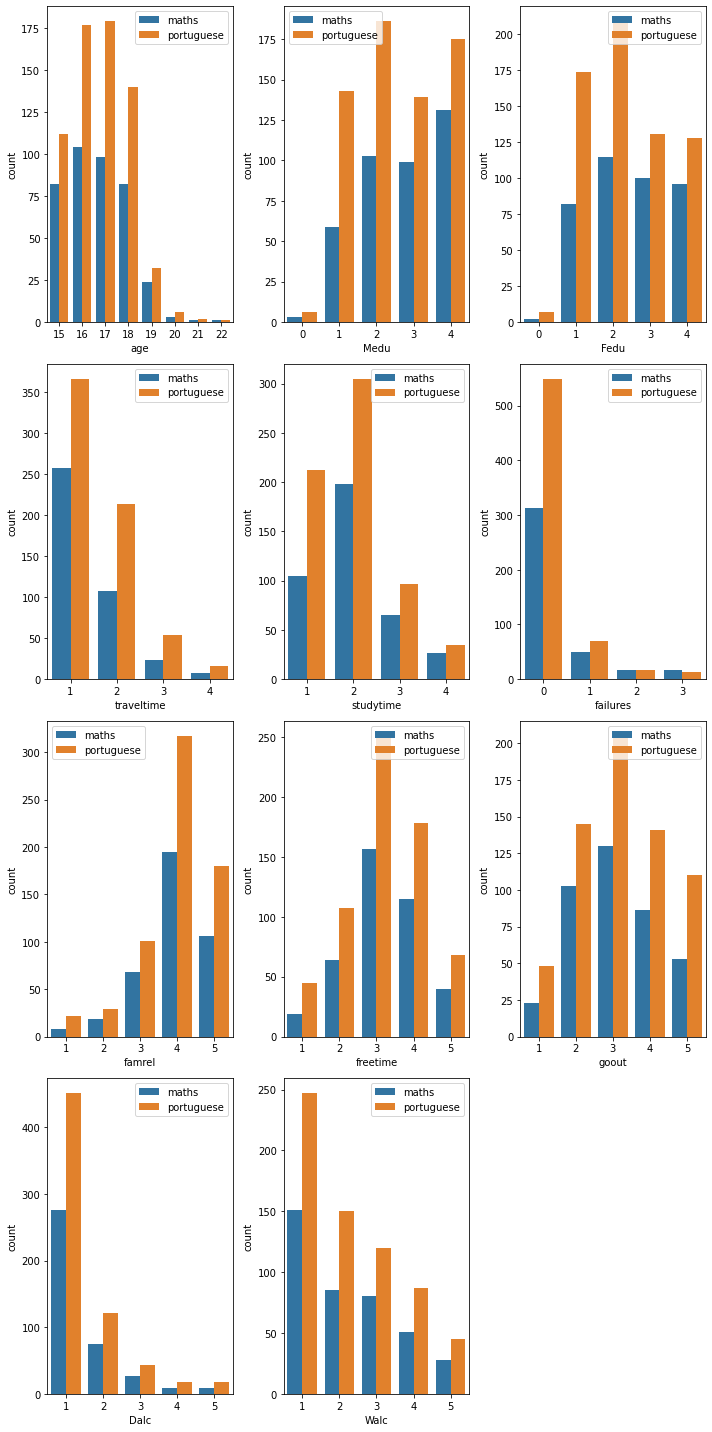

In [ ]:
plt.figure(figsize=(10,20))

for n, m in zip(int_col,range(1,12)):
  plt.subplot(4,3,m)
  sns.countplot(x=n,hue='sub', data=data)
  plt.legend(loc='best')

plt.tight_layout()


Age: Most students are between the age of 16 to 17.

Medu: Most mothers have an education up to 9th grade.

Fedu: Most fathers have an education up to 9th grade.

Medu vs Fedu: More mothers have a higher education compared to father's.

TravelTime: Most students travel less than 15 mins to school.

StudyTime: Most students weekly study time is between 2 to 5 hours.

Failures: Most students pass their past classes.

Famrel: Most students have a good relationship with their family.

Freetime & Goout: Most students have an average free time and also go out with their friends.

Dalc: Most students do not drink alcohol during the workday.

Walc: Most students do not drink alcohol during the weekend, but they do drink more compare to the workday.

In [ ]:
hist_col = ['absences','G1','G2','G3']

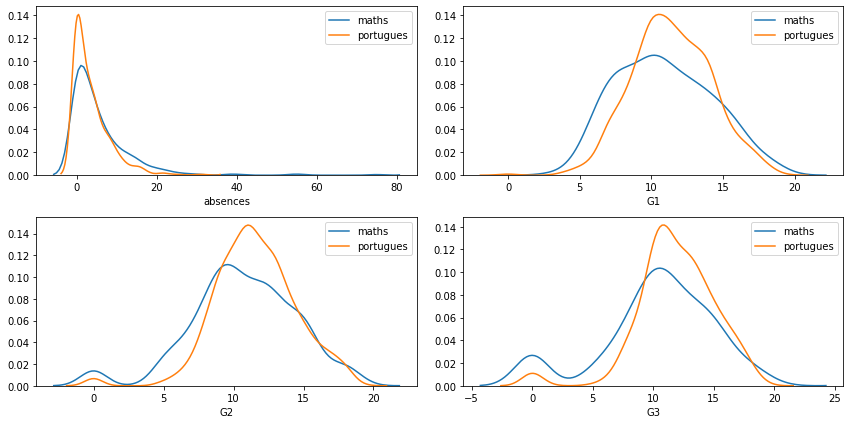

In [ ]:
plt.figure(figsize=(12,6))

for n, m in zip(hist_col,range(1,5)):
  plt.subplot(2,2,m)
  sns.kdeplot(data[data['sub']=='maths'][n], label='maths')
  sns.kdeplot(data[data['sub']=='portuguese'][n], label='portugues')
  plt.xlabel(n)

plt.tight_layout()

Absences: Most students have around zero number of school absences.

G1, G2, G3: Most students achieve a score of around 10.

#### Relationship

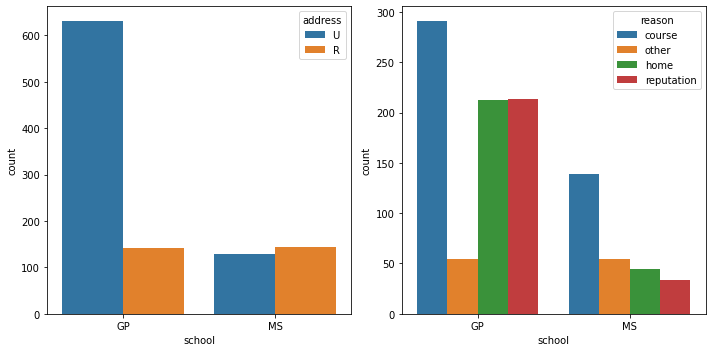

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data['school'],hue=data['address'])

plt.subplot(1,2,2)
sns.countplot(data['school'],hue=data['reason'])

plt.tight_layout()

Most students living in Urban areas attend Gabriel Pereira.

They choose Gabriel Pereira because of their reputation and distance from their home.

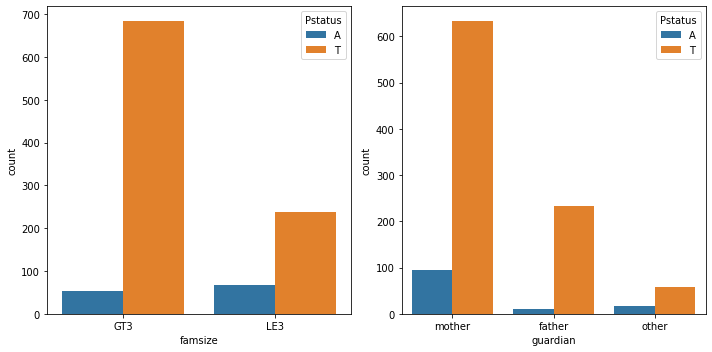

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data['famsize'], hue=data['Pstatus'])

plt.subplot(1,2,2)
sns.countplot(data['guardian'], hue=data['Pstatus'])

plt.tight_layout()

Students whose family size are greater than 3 mostly live with their parents.

Students who live with their parents have their mother as a guardian.

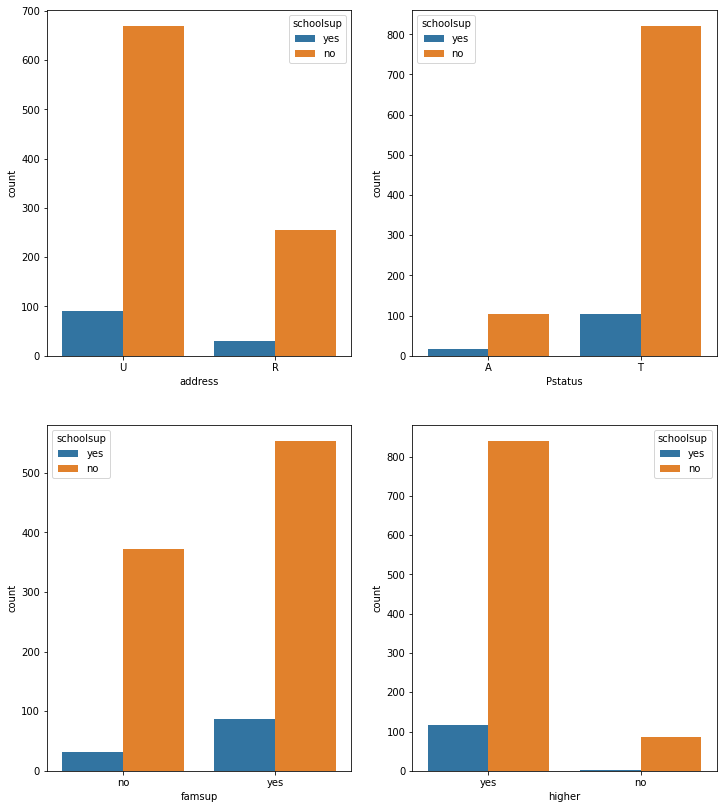

In [ ]:
plt.figure(figsize=(12,14))

plt.subplot(2,2,1)
sns.countplot(data['address'], hue=data['schoolsup'])

plt.subplot(2,2,2)
sns.countplot(data['Pstatus'], hue=data['schoolsup'])

plt.subplot(2,2,3)
sns.countplot(data['famsup'], hue=data['schoolsup'])

plt.subplot(2,2,4)
sns.countplot(data['higher'], hue=data['schoolsup'])

Students who lived in urban areas do not usually have extra educational support.

Most students who are living together with their parents have no extra educational support.

Most students who are under family for educational support do not have extra educational support.

Students who wish to pursuit a higher education are more likely to require extra educational support compare to those that do not.

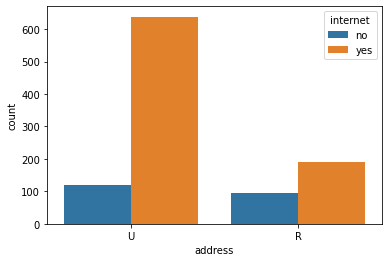

In [ ]:
sns.countplot(data['address'], hue=data['internet'])

Student who lived in rural areas have less access to the internet at home.

#### Correlation

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
# copy dataframe
data_en = data.copy()

In [ ]:
# encode categorical data to numerical value
for n in obj_col:
  data_en[n] = le.fit_transform(data_en[n])

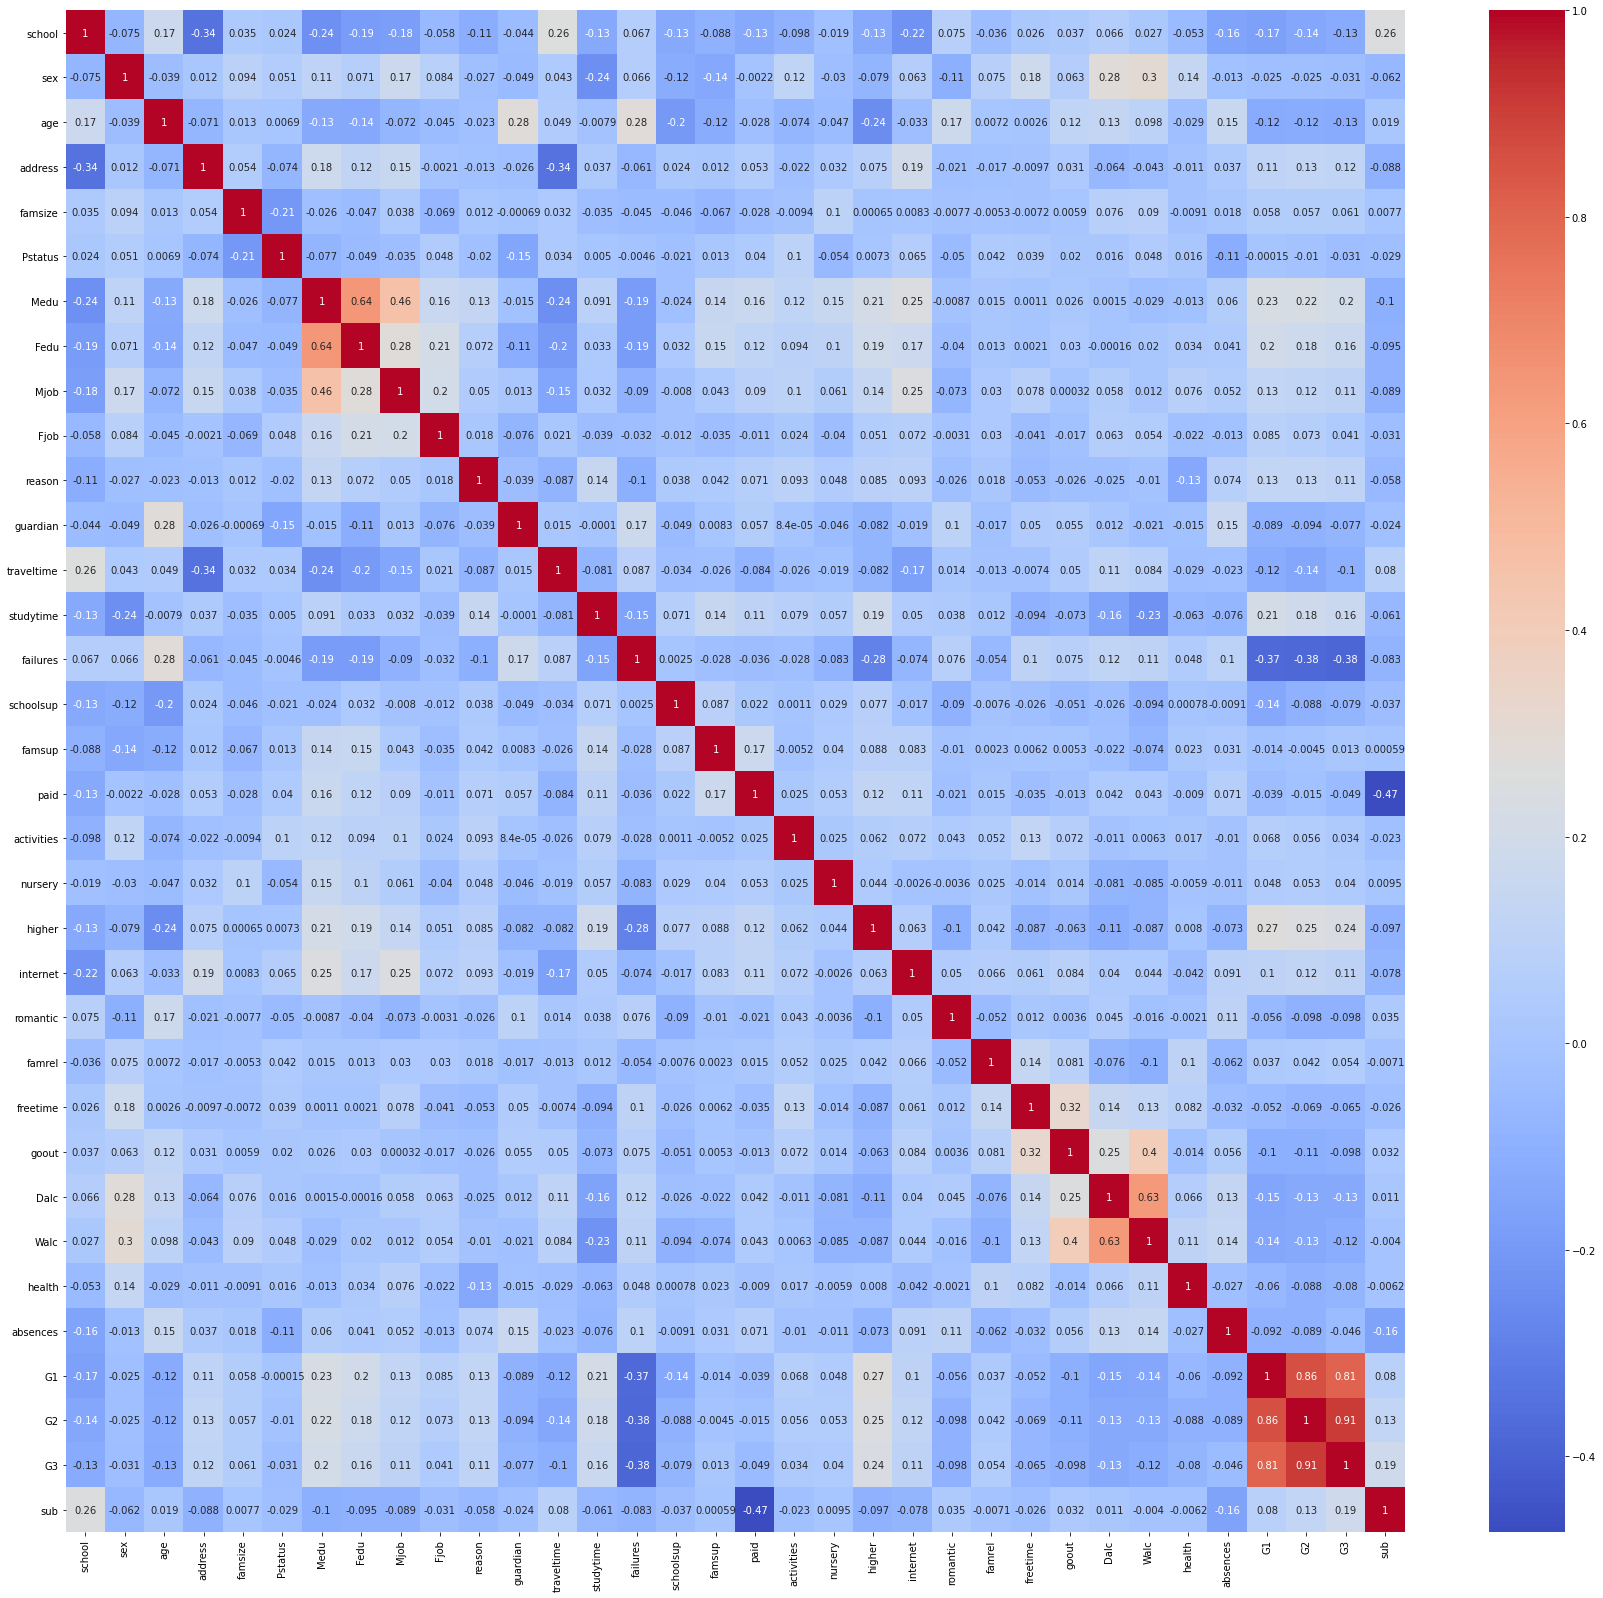

In [ ]:
plt.figure(figsize=(30,28))

sns.heatmap(data_en.corr(), cmap='coolwarm', annot=True)

## Data Pre-processing for Model

In [ ]:
x = data.drop('G3', axis = 1)

y = data['G3']

In [ ]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for n in x.dtypes[x.dtypes == np.object].index:
  x[n] = le.fit_transform(x[n])

x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,sub
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,0
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,0
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,0


In [ ]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

## Model: Basic

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold, cross_val_score

In [ ]:
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NBC', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=10, random_state=101, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.353127 (0.058047)
DTC: 0.358032 (0.057873)
RFC: 0.391609 (0.061680)
KNN: 0.275502 (0.045188)
NBC: 0.214458 (0.025022)
SVM: 0.362808 (0.053312)


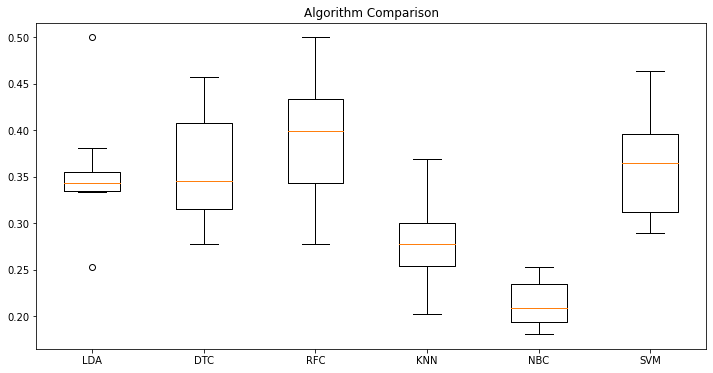

In [ ]:
plt.figure(figsize=(12,6))

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')

plt.show()

RFC have a better mean score compare to the other models

#### Prediction & Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predictions
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

In [ ]:
# Evaluate predictions
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[13  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  3  1  1  0  0  0  0  0  0  0  0  0]
 [ 2  1  1  0  5  1 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  7  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 14  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  8 17  2  1  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  3  7  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  4 14  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  9  3  3  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  9  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  5  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  3  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  1  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           5       0.00      0.00      0.00         3
           6       0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Data Pre-processing: Shuffle Dataset & Feature Selection

In [ ]:
# randomize the rows
from sklearn.utils import shuffle

In [ ]:
data_ran = shuffle(data)

data_ran.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sub
93,GP,F,16,U,GT3,T,4,2,teacher,services,home,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,3,3,1,1,1,2,13,14,14,portuguese
246,GP,M,17,U,GT3,T,2,3,other,other,course,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,2,2,1,1,2,4,12,12,13,maths
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,5,5,5,5,16,10,12,11,maths
156,GP,F,15,U,GT3,T,1,1,other,services,course,father,1,2,0,no,yes,no,no,yes,yes,yes,no,4,4,2,1,2,5,0,12,12,12,portuguese
371,GP,F,18,U,GT3,T,2,2,other,other,course,mother,1,1,0,no,yes,no,yes,yes,yes,yes,yes,4,3,5,2,4,5,2,10,10,10,portuguese


In [ ]:
x = data_ran.drop('G3', axis = 1)

y = data_ran['G3']

In [ ]:
# encode categorical data
le = LabelEncoder()

for n in x.dtypes[x.dtypes == np.object].index:
  x[n] = le.fit_transform(x[n])

x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,sub
93,0,0,16,1,0,1,4,2,4,3,1,1,2,2,0,0,1,0,1,1,1,1,0,5,3,3,1,1,1,2,13,14,1
246,0,1,17,1,0,1,2,3,2,2,0,0,2,1,0,0,0,0,0,1,1,1,0,5,2,2,1,1,2,4,12,12,0
29,0,1,16,1,0,1,4,4,4,4,1,1,1,2,0,0,1,1,1,1,1,1,1,4,4,5,5,5,5,16,10,12,0
156,0,0,15,1,0,1,1,1,2,3,0,0,1,2,0,0,1,0,0,1,1,1,0,4,4,2,1,2,5,0,12,12,1
371,0,0,18,1,0,1,2,2,2,2,0,1,1,1,0,0,1,0,1,1,1,1,1,4,3,5,2,4,5,2,10,10,1


In [ ]:
X_train_ran, X_test_ran, y_train_ran, y_test_ran = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
# feature selection using ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

anova = SelectKBest(score_func=f_classif, k='all')

feature1 = anova.fit(X_train_ran, y_train_ran)

# score
score = pd.DataFrame({'Feature': x.columns,
                      'Score': feature1.scores_})

print(score.nlargest(10,'Score'))

     Feature       Score
31        G2  336.711367
30        G1  180.387913
14  failures   13.507343
29  absences    5.502462
32       sub    4.573996
20    higher    3.881090
6       Medu    3.861772
26      Dalc    2.863805
0     school    2.372939
7       Fedu    2.221422


In [ ]:
# feature selection using Chi-squared 
from sklearn.feature_selection import chi2

chi = SelectKBest(score_func=chi2, k='all')

feature2 = chi.fit(X_train_ran, y_train_ran)

# score
score = pd.DataFrame({'Feature': x.columns,
                      'Score': feature2.scores_})

print(score.nlargest(10,'Score'))

      Feature       Score
29   absences  836.076443
31         G2  730.680151
30         G1  534.513493
14   failures  313.248171
6        Medu   31.772067
10     reason   30.849804
0      school   30.640209
32        sub   29.327932
27       Walc   27.859390
15  schoolsup   27.641543


In [ ]:
# choose the top 10 features using ANOVA
anova = SelectKBest(score_func=f_classif, k=10)

fs1 = anova.fit(X_train_ran, y_train_ran)

X_train_fs1 = fs1.transform(X_train_ran)
X_test_fs1 = fs1.transform(X_test_ran)

In [ ]:
# choose the top 10 features using Chi-squared
chi = SelectKBest(score_func=chi2, k=10)

fs2 = chi.fit(X_train_ran, y_train_ran)

X_train_fs2 = fs2.transform(X_train_ran)
X_test_fs2 = fs2.transform(X_test_ran)

## Model: Feature selection - ANOVA

In [ ]:
results1 = []
names1 = []

for name, model in models:
  kfold = KFold(n_splits=10, random_state=101, shuffle=True)
  cv_results = cross_val_score(model, X_train_fs1, y_train_ran, cv=kfold, scoring='accuracy')

  results1.append(cv_results)
  names1.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.407100 (0.040072)
DTC: 0.357960 (0.050058)
RFC: 0.462321 (0.044060)
KNN: 0.386733 (0.053216)
NBC: 0.243115 (0.050633)
SVM: 0.396472 (0.048065)


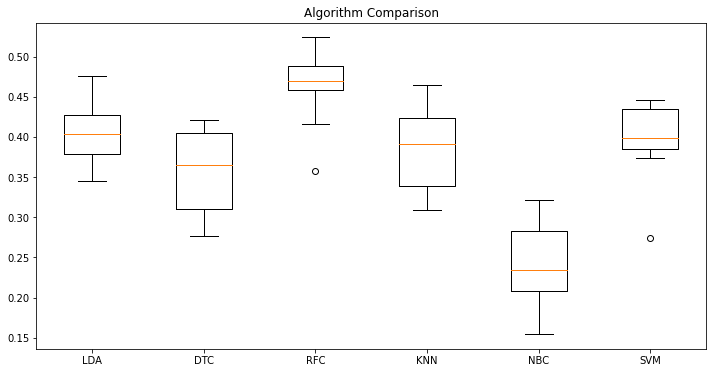

In [ ]:
plt.figure(figsize=(12,6))

plt.boxplot(results1, labels=names1)
plt.title('Algorithm Comparison')

plt.show()

RFC has a better mean average score compare to the other models

#### Prediction & Evaluation

In [ ]:
# Predictions
rfc = RandomForestClassifier()

rfc.fit(X_train_fs1, y_train_ran)

pred1 = rfc.predict(X_test_fs1)

In [ ]:
# Evaluate predictions
print(confusion_matrix(y_test_ran, pred1))
print(classification_report(y_test_ran, pred1))

[[ 7  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  8  1  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  1  2  7  1  0  0  0  0  0  0  0  0]
 [ 2  0  0  2  3  0 20  8  0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  3 17  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5  7  7  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  6 12  5  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  4  5  4  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  6 10  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  2  2  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]]
              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
           5       0.00      0.00      0.00         2
           6       1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model: Feature selection - Chi-squared

In [ ]:
results2 = []
names2 = []

for name, model in models:
  kfold = KFold(n_splits=10, random_state=101, shuffle=True)
  cv_results = cross_val_score(model, X_train_fs2, y_train_ran, cv=kfold, scoring='accuracy')

  results2.append(cv_results)
  names2.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.411933 (0.023835)
DTC: 0.374900 (0.043459)
RFC: 0.462134 (0.055283)
KNN: 0.356799 (0.046189)
NBC: 0.312608 (0.033964)
SVM: 0.389329 (0.052846)


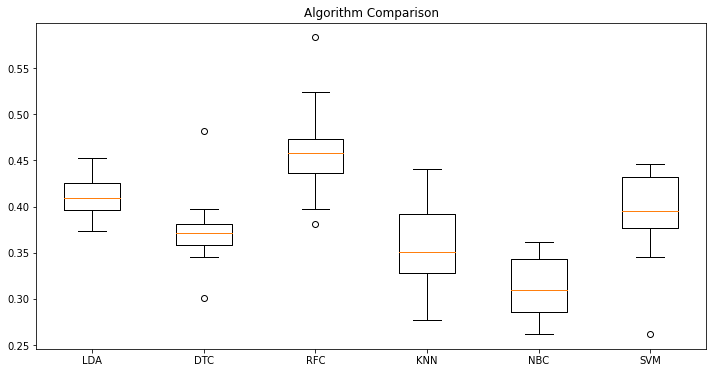

In [ ]:
plt.figure(figsize=(12,6))

plt.boxplot(results2, labels=names2)
plt.title('Algorithm Comparison')

plt.show()

RFC still has a better score.

#### Prediction & Evaluation

In [ ]:
# Predictions
rfc = RandomForestClassifier()

rfc.fit(X_train_fs2, y_train_ran)

pred2 = rfc.predict(X_test_fs2)

In [ ]:
# Evaluate predictions
print(confusion_matrix(y_test_ran, pred2))
print(classification_report(y_test_ran, pred2))

[[ 7  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  7  2  1  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  1  2  5  2  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  4  2 19  8  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  5 16  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  5  3 10  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  4 15  5  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  5  3  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  6 10  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  4  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  2  4  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]]
              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
           5       0.00      0.00      0.00         2
           6       0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Compare Models Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
compare = pd.DataFrame({'Model':['RFC Model: Basic','RFC Model: Shuffle & FS - ANOVA','RFC Model: Shuffle & FS - Chi-squared'],
                        'Accuracy':[accuracy_score(y_test,pred), accuracy_score(y_test_ran,pred1), accuracy_score(y_test_ran,pred2)]})

compare

,Model,Accuracy
0,RFC Model: Basic,0.406699
1,RFC Model: Shuffle & FS - ANOVA,0.444976
2,RFC Model: Shuffle & FS - Chi-squared,0.449761


By applying feature selection and shuffling the dataset, the RFC model was apply to increase it's accuracy to 5%.